<a href="https://colab.research.google.com/github/MaratGin/ICV-projects/blob/main/ICV_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Home Work №1**

## **Task 1**

**Step 1.** - Download image using wget

---



``` bash
!wget --user-agent="Mozilla/5.0" https://imgur.com/ZQndAxI -O traffic_light.png
```



In [ ]:
!wget --user-agent="Mozilla/5.0" https://i.imgur.com/ZQndAxI.jpeg -O traffic_light.png

--2024-11-26 09:48:54--  https://i.imgur.com/ZQndAxI.jpeg
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1650361 (1.6M) [image/jpeg]
Saving to: ‘traffic_light.png’

traffic_light.png   100%[===================>]   1.57M  --.-KB/s    in 0.07s   

2024-11-26 09:48:55 (23.6 MB/s) - ‘traffic_light.png’ saved [1650361/1650361]



In [ ]:
!ls -lh

total 1.6M
drwx------ 6 root root 4.0K Nov 26 09:48 drive
drwxr-xr-x 1 root root 4.0K Nov 22 14:23 sample_data
-rw-r--r-- 1 root root 1.6M Sep 20 06:26 traffic_light.png


**Step 2:** Load the image using OpenCV and display it using Matplotlib. Print out the following properties:

*   **resolution** (width and height of the image)
*   **color depth** (bit depth per channel)
*   **number of channels** (usually 3 for a color image)
*   **data type** (the type of values stored in the image array)

In [ ]:
# import libraries

import cv2
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#### **Load image and show it**

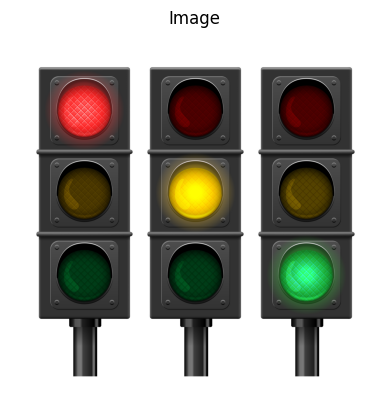

In [ ]:
path = 'traffic_light.png'

# Reading an image in default mode
img = cv2.imread(path)

# Handling possible error from loading image
if img is None:
  raise FileNotFoundError(f'Could not load image: {path}')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Image')
plt.axis('off')
plt.imshow(img)
plt.show()



#### **Show resolution**

In [ ]:
# get sizes
height, width, channels = img.shape

print(f"image Resolution: {width} x {height}")

image Resolution: 5400 x 5400


#### **Show color depth**

In [ ]:
# check what depth of the color
color_depth = img.dtype
if color_depth == 'uint8':
    bits_per_channel = 8
elif color_depth == 'uint16':
    bits_per_channel = 16
elif color_depth == 'float32':
    bits_per_channel = 32
else:
    bits_per_channel = 0

num_channels = img.shape[2] if len(img.shape) == 3 else 1
total_color_depth = bits_per_channel * num_channels
print(f'bits per channel: {bits_per_channel}, total depth: {total_color_depth} bits')


bits per channel: 8, total depth: 24 bits


#### **Number of channels**

In [ ]:
num_channels = img.shape[2] if len(img.shape) == 3 else 1
print(f"number of channels: {num_channels}")

number of channels: 3


#### **Data type**

In [ ]:
data_type = img.dtype
print(f"data type: {data_type}")

data type: uint8


**Step 3:** Convert the image into grayscale using OpenCV and display it using Matplotlib.

1. What is the difference between the color and grayscale images?
2. Is it possible to recover color from the grayscale image?

Answer:
1. Цветные картинки обычно представляются сразу несколькими цветовыми каналами, например в  **RGB** используется *красный*, *зелёный* и *синий* каналы. а Grayscale картинки имеют только один канал, который представляет интенсивность пикселя, меньшие значения (ближе к 0) обозначают **темные оттенки**, а более высокие значения — **светлые**.
2. **Идеально точную цветную картинку получить нельзя**, так как в *Grayscale* картинках не хранится информация, какие цветовые каналы были использованы, есть только информация об интенсивности пикселя. Однако существуют некоторые подходы (обученные нейросети или работа вручную), с помощью которых можно получить "*приблизительное*" цветное изображение, угадывая примерный цвет каждого пикселя.


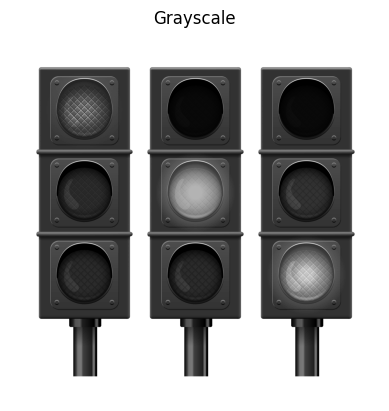

In [ ]:
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title('Grayscale')
plt.imshow(grayscale, cmap='gray')
plt.axis('off')
plt.show()

**Step 4:** Swap the color channels (Red, Green, and Blue) of the original image: red ⇔ green, green ⇔ blue.
* Display the original image alongside the modified image with color channels swapped.
* What happened to the yellow color?
* How would you swap the colors of the illuminated traffic lights (e.g., red on the left, yellow in the center, and green on the right)?

Answer:
* Желтый цвет сменился на розовый
* С помощью OpenCV можно выделить зоны определённого цвета, накинуть маски на эти зоны, а потом сменить их.

#### **Swap color channels**

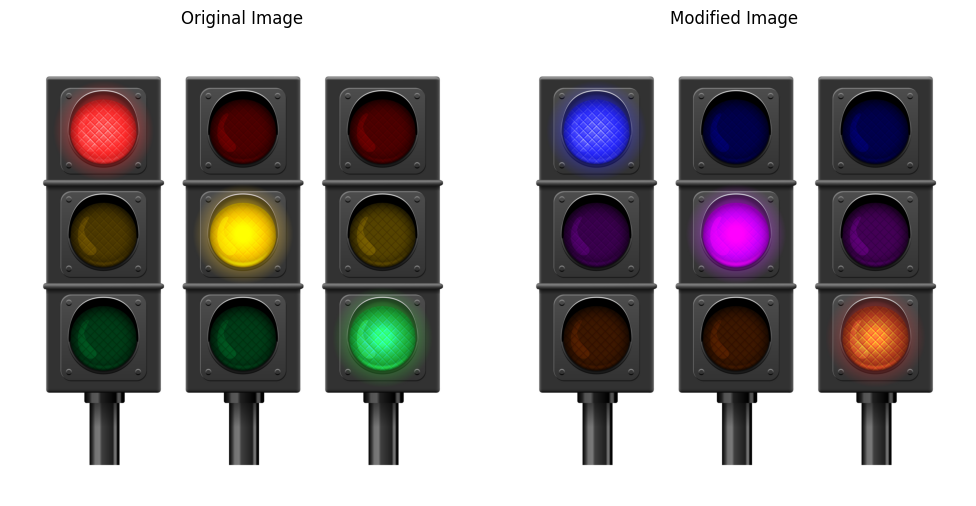

In [ ]:
# separate channels (blue, green, red)
blue_channel, green_channel, red_channel = cv2.split(img)

# swap channels: red ⇔ green, green ⇔ blue BGR -> GRB
modified_image = cv2.merge([green_channel, red_channel, blue_channel])

plt.figure(figsize=(10, 5))



# original
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# modified Image
plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

# show the plot
plt.tight_layout()
plt.show()

## **Task 2**

**Step 1.** - Generate a 32 x 32 binary image with all pixels along the main diagonal set to 0 (black) and all other pixels set to 1 (white). Then, randomly place 32 black pixels elsewhere on the image, ensuring they do not overlap with the main diagonal.

In [ ]:
np.set_printoptions(threshold=sys.maxsize)

# generate array filled with ones and 32 x 32 size
arr = np.ones((32,32))

np.fill_diagonal(arr, 0)

# get all indexes, which are not in diagonal
allowed_indexes = [(x, y) for x in range(32) for y in range(32) if x != y]


# generate random point, pop it from allowed_indexes
# so we will not get this point again, and then assign 0 to this point
for i in range(32):
  point = allowed_indexes.pop(random.randint(0,len(allowed_indexes) - 1))
  arr[point[0]][point[1]] = 0

print(arr)




[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 

**Step 2:** Modify the patterned binary image:
* Invert the image: change all the 0s to 1s and all 1s to 0s.
* Flip the image (perform image flipping to observe how the main diagonal shifts):
* flip horizontally
* flip vertically


#### **Invert the image**

In [ ]:
inverted = 1 - arr

#### **Flip the image *horizontally* and *vertically*:**

In [ ]:
# flip image vertically using OpenCV
flipped_vertically = cv2.flip(arr, 0)
print(flipped_vertically)
# flip image horizontally using OpenCV
flipped_horizontally = cv2.flip(arr, 1)
print(flipped_horizontally)

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
  1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
  1. 1. 1. 1. 1. 

**Step 3:** Display the original image alongside the modified versions: inverted, flipped horizontally, and flipped vertically.

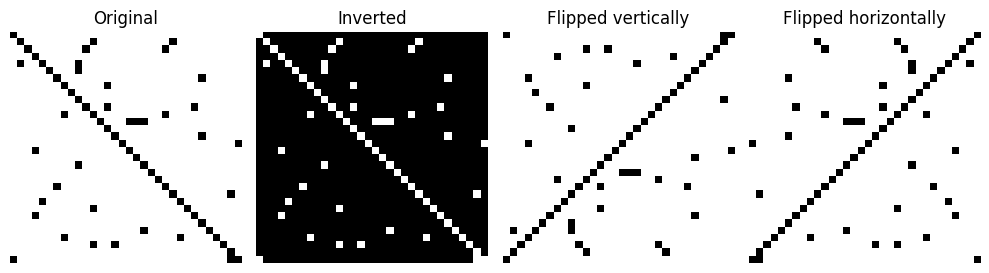

In [ ]:
plt.figure(figsize=(10, 5))

# original Image
plt.subplot(1, 4, 1)
plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
plt.title("Original")
plt.axis('off')

# inverted Image
plt.subplot(1, 4, 2)
plt.imshow(inverted, cmap='gray', vmin=0, vmax=1)
plt.title("Inverted")
plt.axis('off')


# image flipped verrically
plt.subplot(1, 4, 3)
plt.imshow(flipped_vertically, cmap='gray', vmin=0, vmax=1)
plt.title("Flipped vertically")
plt.axis('off')

# image flipped horizontally
plt.subplot(1, 4, 4)
plt.imshow(flipped_horizontally, cmap='gray', vmin=0, vmax=1)
plt.title("Flipped horizontally")
plt.axis('off')

plt.tight_layout()
plt.show()

**Step 4:** Save the original and modified images in both PNG (lossless compression) and JPEG (lossy compression) formats using OpenCV. Compare the file sizes between the two formats. How can you adjust the compression rate for the JPEG format?

In [ ]:
# convert the binary image to appropriate format for PNG and JPEG
# multiply elements of image by 255
grayscale_original = arr * 255
grayscale_inverted = inverted * 255
grayscale_vertical = flipped_vertically * 255
grayscale_horizontal = flipped_horizontally * 255

# save the image as PNG
cv2.imwrite('original.png', grayscale_original)
cv2.imwrite('iverted.png', grayscale_inverted)
cv2.imwrite('flippedVertical.png', grayscale_vertical)
cv2.imwrite('flippedHorizontal.png', grayscale_horizontal)

# save the image as JPEG
cv2.imwrite('original.jpeg', grayscale_original)
cv2.imwrite('iverted.jpeg', grayscale_inverted)
cv2.imwrite('flippedVertical.jpeg', grayscale_vertical)
cv2.imwrite('flippedHorizontal.jpeg', grayscale_horizontal)


True

**Questions:**
---
a. How many different binary images could be generated with this specific rule (see step 1)?
- Так как каждый элемент двумерного массива бинарного изображения может содержать либо 0, либо 1, а всего пикселей 32 * 32 = 1024, из них вычитаем 32 пикселя для диагонали, получаем 992 различныз пикселя.
Всего различных изображений - \
$x^{992}$
---
b. How does the specific pattern (main diagonal) change after each modification?
- При инвертировании диагонали, черные пиксели меняются на белые. При перевороте вокруг оси диагональ меняет свое расположение к другим углам.


## **Task 3**

#### **Step 1.** - Download color image using wget

---



``` bash
wget https://i.imgur.com/JVaTxeY.png
```


In [ ]:
!wget --user-agent="Mozilla/5.0" https://i.imgur.com/JVaTxeY.png -O blueImage.png

--2024-11-26 09:50:39--  https://i.imgur.com/JVaTxeY.png
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 594 [image/png]
Saving to: ‘blueImage.png’

blueImage.png       100%[===================>]     594  --.-KB/s    in 0s      

2024-11-26 09:50:39 (34.7 MB/s) - ‘blueImage.png’ saved [594/594]



#### **Step 2.** -  Load the image and convert it to grayscale using OpenCV.

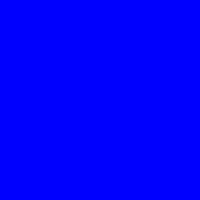

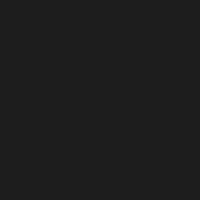

In [ ]:
path = 'blueImage.png'

# original image
img = cv2.imread(path)

# handling possible error from loading image
if img is None:
  raise FileNotFoundError(f'Could not load image: {path}')


# grayscale image
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show images
cv2_imshow(img)
cv2_imshow(grayscale)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### **Step 3:** Create two new images by adjusting the brightness: one with reduced brightness and the other with increased brightness. Ensure proper handling of overflow and underflow to prevent pixel values from exceeding the valid range [0 - 255].

3
uint8


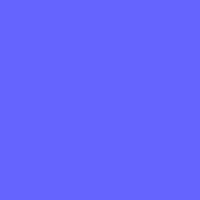

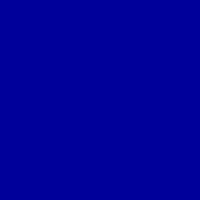

In [ ]:
print(img.shape[2])
print(img.dtype)

bright_image = np.zeros(img.shape, img.dtype)
dark_image = np.zeros(img.shape, img.dtype)

brightness = 100

# make image brighter, we adding additional brightness value
# to every pixel (Blue, Green and Red) of original image

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            bright_image[y,x,c] = np.clip(img[y,x,c] + brightness, 0, 255)

# for darker image we doing the same process but reduce brightness value
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            dark_image[y,x,c] = np.clip(img[y,x,c] - brightness, 0, 255)

cv2_imshow(bright_image)
cv2_imshow(dark_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


#### **Step 4:** Display the original grayscale image along with the two brightness-adjusted images using Matplotlib.

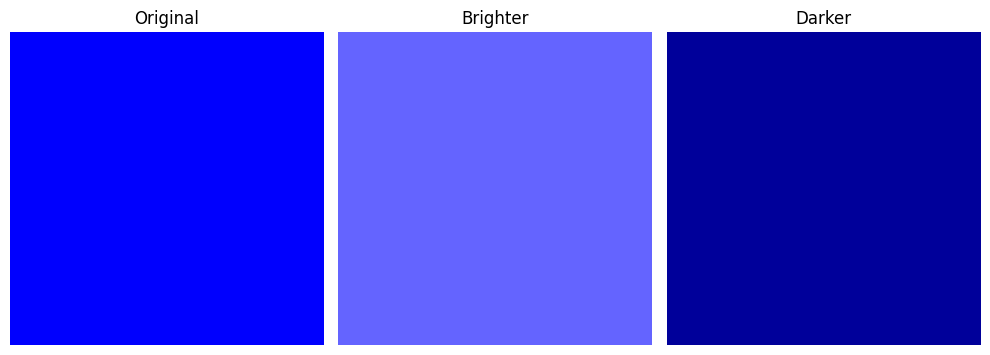

In [ ]:
plt.figure(figsize=(10, 5))

# original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), vmin=0, vmax=1)
plt.title("Original")
plt.axis('off')

# brighter imgae
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB), vmin=0, vmax=1)
plt.title("Brighter")
plt.axis('off')

# darker image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(dark_image, cv2.COLOR_BGR2RGB), vmin=0, vmax=1)
plt.title("Darker")
plt.axis('off')

plt.tight_layout()
plt.show()

#### **Questions:**


---

a. *What happens when you increase the brightness too much?*
-  Если добавить слишком большое значение к яркости, то картинка превратится в полностью белую.
Также картинка превратится в полностью черную, если это значение яркости убавить.  

---

b. *Can you think of applications in robotics where brightness adjustments are important?*

- Мне кажется, подобное увеличение яркости может пригодится для того, чтобы более отчетливо видеть важные контрастные объекты - наприме, дорожную разметку или знаки у камер  автономных автомобилей, штрихкоды для сканирования.



## **Task 4**

**Step 1:** Download a color image from the provided URL.


In [ ]:
!wget --user-agent="Mozilla/5.0" https://imgur.com/ZQndAxI -O blueImage.png

**Step 2:** Load the image and convert it to the HSV color space using OpenCV

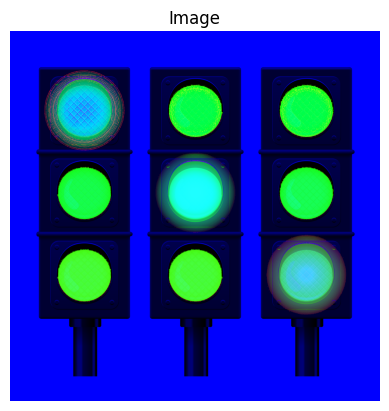

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
path = 'traffic_light.png'

img = cv2.imread(path)

# Handling possible error from loading image
if img is None:
  raise FileNotFoundError(f'Could not load image: {path}')

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.title('Image')
plt.axis('off')
plt.imshow(hsv_img)
plt.show()


**Step 3:** Display the Hue, Saturation, and Value channels separately.


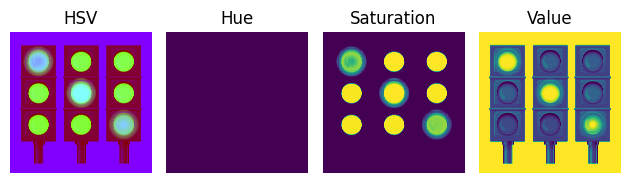

In [ ]:
h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]

# show base HSV photo
plt.subplot(1, 4, 1)
plt.imshow(hsv_img)
plt.title("HSV")
plt.axis('off')

# show Hue layer
plt.subplot(1, 4, 2)
plt.imshow(h)
plt.title("Hue")
plt.axis('off')

# show Saturation layer
plt.subplot(1, 4, 3)
plt.imshow(s)
plt.title("Saturation")
plt.axis('off')

# show Value layer
plt.subplot(1, 4, 4)
plt.imshow(v)
plt.title("Value")
plt.axis('off')

plt.tight_layout()
plt.show()


**Step 4:** Manipulate the HSV channels


#### **Change the Hue**: shift the hue values to change the overall color of the image.

In [ ]:
# Change Hue value
hue_value = 50 # @param {type:"slider", min:0, max:180, step:5}


(-0.5, 5399.5, 5399.5, -0.5)

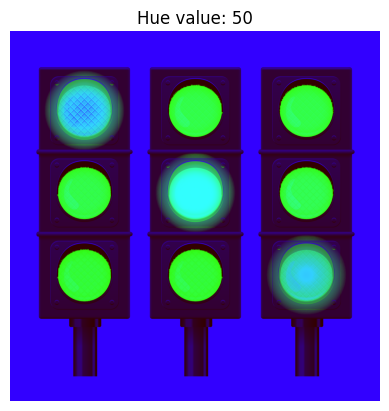

In [ ]:
# apply new Hue value
new_h = h.copy()
new_h.fill(hue_value)

# merge channels
hsv_modified = cv2.merge([new_h, s, v])

# show photo with changed Hue
plt.subplot(1, 1, 1)
plt.imshow(hsv_modified)
plt.title(f"Hue value: {hue_value}")
plt.axis('off')

#### **Adjust the Saturation**: increase or decrease the saturation to make colors more vivid or muted.

In [ ]:
# Change Hue value
saturation_change = 20 # @param {type:"slider", min:-255, max:255, step:5}


(-0.5, 5399.5, 5399.5, -0.5)

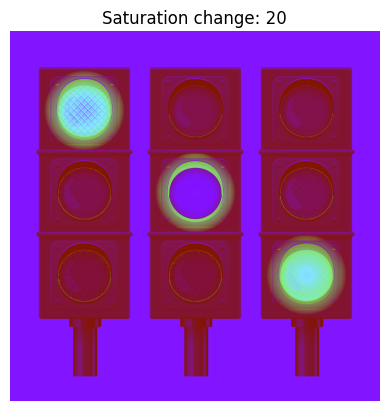

In [ ]:
# apply saturation change and mod 255, so value will be in correct area
new_s = np.clip((s + saturation_change), 0, 255).astype(np.uint8)

# merge channels
hsv_modified_s = cv2.merge([h, new_s, v])

# show photo with changed Saturation
plt.imshow(hsv_modified_s)
plt.title(f"Saturation change: {saturation_change}")
plt.axis('off')

#### **Adjust the Value**: modify the brightness of the image by adjusting the value channel.

In [ ]:
# Change Value channel
value_change = -240 # @param {type:"slider", min:-255, max:255, step:5}


(-0.5, 5399.5, 5399.5, -0.5)

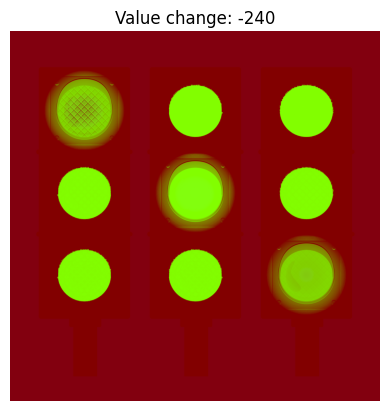

In [ ]:
# apply value change and mod 255, so value will be in correct area
new_v = np.clip((v + value_change), 0, 255).astype(np.uint8)

# merge channels
hsv_modified_v = cv2.merge([h, s, new_v])

# show photo with changed Saturation
plt.imshow(hsv_modified_v)
plt.title(f"Value change: {value_change}")
plt.axis('off')

#### **Questions:**

---
a. How does the HSV model differ from RGB in terms of how colors are represented?

- В RGB - пискель представляется интенсивностью трех цветов - **красного**(0-255), **зелёного**(0-255) и **синего**(0-255). В то время HSV представляет комбинацию из: **1. Hue** - Оттенок, представляет собой цвет пикселя(0° = красный, 120° = зелёный, 240° = синий.) **2. Saturation**  - интенсивность цвета, маленькое значение делает пиксель тусклым и сероватым, большое значение делает контрастным. **3. Value** - Яркость пикселя(0-255).
---
b. How does shifting the hue channel differ from changing colors directly in the RGB model?

- Чтобы изменять цвета в **RGB** необходимо сразу работать *со значениями всех трёх каналов*. В то время как в **HSV** достаточно менять только канал **Hue**, что упрощает работу с цветами.
---

c. In which situations might the HSV color space be more useful than RGB?

- Использование **HSV** может быть удобнее **RGB**, когда нужно работать с определёнными цветами, например, изолировать какой-нибудь из цветов. Также с HSV будет эффективнее работать, когда у изображения есть деффекты(засветы/много теней), так как влияние этих деффектов можно поправить, работая с каналами **Saturation/Value**


## **Task 4**


**Step 1:** Download and load the image from the provided link, then convert it to the HSV color space.

In [ ]:
!wget --user-agent="Mozilla/5.0" https://imgur.com/ZQndAxI -O blueImage.png

**Step 2:** Adjust the Hue, Saturation, and Value (HSV) lower and upper bounds to segment the green, yellow, and red colors from the image.

**Step 3:** Using the defined color ranges, create a combined binary mask where pixels within the specified ranges are set to white(255), and all other pixels are set to black(0).

#### **Segment red color**

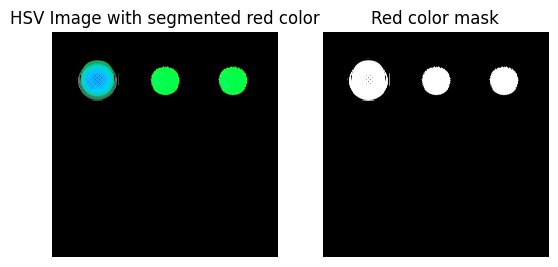

In [ ]:
path = 'traffic_light.png'

img = cv2.imread(path)

# Handling possible error from loading image
if img is None:
  raise FileNotFoundError(f'Could not load image: {path}')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the HSV range for lower red
lower_red_lower = np.array([0, 100, 50])
lower_red_upper = np.array([10, 255, 255])

upper_red_lower = np.array([160, 100, 100])
upper_red_upper = np.array([179, 255, 255])

mask_lower_red = cv2.inRange(img_hsv, lower_red_lower, lower_red_upper)
mask_upper_red = cv2.inRange(img_hsv, upper_red_lower , upper_red_upper)

# Combine the two masks to get the full red range
red_mask = cv2.bitwise_or(mask_lower_red, mask_upper_red)
# Apply the mask to the original image
image_masked = cv2.bitwise_and(hsv_img, hsv_img, mask=red_mask)

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(image_masked)
plt.title('HSV Image with segmented red color')

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(red_mask, cmap='gray')
plt.title('Red color mask')

plt.show()

#### **Segment green color**

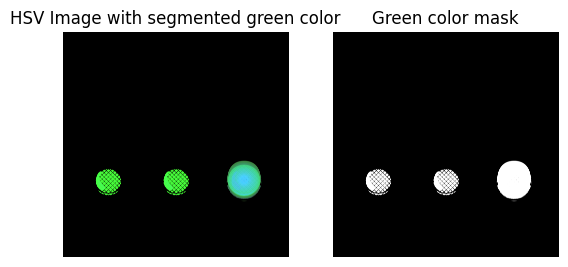

In [ ]:
# HSV for green color
lower_green = np.array([35, 100, 50])
upper_green = np.array([85, 255, 255])

# get mask for green color
green_mask = cv2.inRange(img_hsv, lower_green, upper_green)

# Apply the mask to the original image
image_masked = cv2.bitwise_and(hsv_img, hsv_img, mask=green_mask)

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(image_masked)
plt.title('HSV Image with segmented green color')

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(green_mask, cmap='gray')
plt.title('Green color mask')

plt.show()

#### **Segment yellow color**

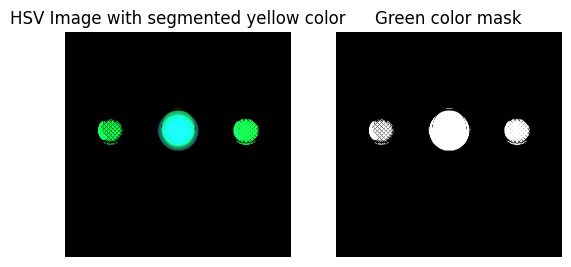

In [ ]:
# HSV for yellow color
lower_yellow = np.array([10, 90, 70])
upper_yellow = np.array([30, 255, 255])

# get mask for yellow color
green_mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

# Apply the mask to the original image
image_masked = cv2.bitwise_and(hsv_img, hsv_img, mask=green_mask)

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(image_masked)
plt.title('HSV Image with segmented yellow color')

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(green_mask, cmap='gray')
plt.title('Green color mask')

plt.show()

#### **Questions:**
---

a. What would happen if you try to segment colors in an image with shadows or lighting variations?
- засвет/затемление может ухудшить точность определения цвета на изображении, например, засветлённые участки желтого цвета могут определяться как белые, из-за чего сегментация цвета будет неточной. То же может произойти и с тенями, будут появляться шумы.
---

b. Why is HSV more effective for color segmentation compared to RGB?
- В отличие от RGB, использование HSV как раз может помочь работать с изображениями, которые имеют различные дефекты(Засветы, затемнения), так как цвета расположены в отдельном канале Hue, а яркость и контраст можно изменить в отдельных каналах(Saturation, Value).